# Earth and Moon Orbit with Solar Center

This module creates a chart which provides the orbit of the Earth and Moon relative to the Sun for a number of years. 

In [4]:
# add necessary imports
import numpy as np
import matplotlib.pyplot as plt

# constants

G = 4*np.pi**2

mass = {
    'sun': 1.0,
    'earth': 3.0034e-6,
    'moon': 3.6923e-7}

r0 = {
    'sun': np.array([0,0,0]),
    'earth': np.array([9.978977040419635E-01, 6.586825681892025E-02, -6.320430920521123E-06]),
    'moon': np.array([9.956768547953816E-01, 6.676030485840675E-02, 1.641093070596718E-04])
     }
v0 = {
    'sun': np.array([0,0,0]),
    'earth': np.array([-4.70015711e-01, 6.25165839e+00, -3.40817831e-04]),
    'moon': np.array([-0.55065949, 6.03534661, 0.01111456])
}

# functions
def F_gravity(ri, rj, mi, mj):
    # calculate the needed vector math
    # difference vector
    rij_vector = np.array([ri[0] - rj[0], ri[1] - rj[1], ri[2] - rj[2]])
    # scalar - length of difference vector
    rij = np.sqrt(rij_vector[0] ** 2 + rij_vector[1] ** 2 + rij_vector[2] ** 2)
    # unit vector from body j toward body i
    rij_hat = rij_vector / rij
    
    # calculate using Newton's law of universal gravitation 
    return -((G * mi * mj) / rij ** 2) * rij_hat
    
def F_ES(rE):
    return F_gravity(rE, r0['sun'], mass['earth'], mass['sun'])

def F_EM(rE, rM):
    return F_gravity(rE, rM, mass['earth'], mass['moon'])

def F_ME(rE, rM):
    return F_gravity(rM, rE, mass['moon'], mass['earth'])

def F_MS(rM):
    return F_gravity(rM, r0['sun'], mass['moon'], mass['sun'])

def F_E(rE, rM):
    return F_ES(rE) + F_EM(rE, rM)

def F_M(rE, rM):
    return F_MS(rM) + F_ME(rE, rM)

def integrate_EM(tmax, dt = 1e-3):
    # intialize interators
    time = 0
    count = 0
    
    # initial vector and velocity values
    r_earth = np.array([r0['earth']])
    v_earth = np.array([v0['earth']])
    r_moon = np.array([r0['moon']])
    v_moon = np.array([v0['moon']])
    
    while tmax >= time:
        # calculate new position vector (t + 1)
        r_earth = np.row_stack((r_earth, r_earth[count] + v_earth[count] * dt))
        r_moon = np.row_stack((r_moon, r_moon[count] + v_moon[count] * dt))
        
        # calculate new velocity vector (t + 1)       
        v_earth = np.row_stack((v_earth, 
                        (v_earth[count]) + ((1 / mass['earth']) * F_E(r_earth[count + 1], r_moon[count + 1]) * dt)))
        v_moon = np.row_stack((v_moon, 
                        (v_moon[count]) + ((1 / mass['moon']) * F_M(r_earth[count + 1], r_moon[count + 1]) * dt)))
        
        # iterate
        count += 1
        time += dt
    
    return r_earth, r_moon

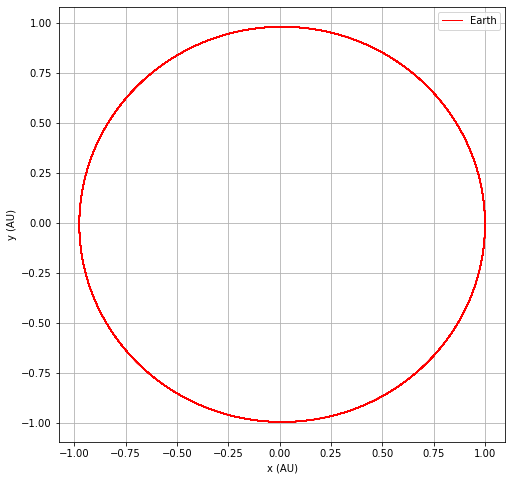

In [32]:
# create Earth and Moon trajectories
earth_coords, moon_coords = integrate_EM(120)
    
# create the figure and set size
fig = plt.figure(figsize=[8,8])

# create plot
ax = fig.add_subplot()
ax.plot(earth_coords[:,0], earth_coords[:,1], 'r-', label = 'Earth', linewidth = 1.0)
#plt.plot(moon_coords[:,0], moon_coords[:,1], 'b--', label = 'Moon')

# label
ax.legend()
ax.set_xlabel('x (AU)')
ax.set_ylabel('y (AU)')

# set background and grid
#plt.axes().set_facecolor('#D9D9D6')
ax.grid(True)
# add starting point
#plt.plot(r0['earth'][0], r0['earth'][1], "r^")

fig.savefig("orbit_120y_earth.png")
